# Brief overview of CMB maps and spectra

In this tutorial, we will learn some basics of CMB maps and spectra handling. As usual, you can run the tutorial on google drive, just open it with google colab.

In [ ]:
#If you are running with google colab, authenticate yourself by running this cell
# Follow the instructions: click on the link, authenticate with your gmail account,
# copy the link and paste it below
from google.colab import drive
drive.mount('/content/drive')
!ls /content/drive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
'My Drive'


In [ ]:
# Now, let's load some useful modules:
# numpy for maths
# matplotlib.pyplot for making nice figures
import numpy as np
import matplotlib.pyplot as plt

# Set data path
path_to_data='/content/drive/My Drive/s-nsbp/'

In [ ]:
# This will install another useful module in your drive
# healpy is the module used for maps and spectra handling

!pip install healpy

     |████████████████████████████████| 11.8MB 330kB/s 


In [1]:
import healpy as hp

# Let's read a CMB map

We will load the CMB maps reconstructed by the Planck satellite. These maps are saved in the file 'Planck_file'. We will read them using the function 'read_map' from healpy. The function takes a .fits file (common file format within the astro community) in input and returns an array (or a series of arrays) with the maps.

In [ ]:
Planck_file='camb_files/Planck_ns256.fits'
Planck,h=hp.read_map(path_to_data + Planck_file,[0,1,2],h=True)

/usr/local/lib/python3.6/dist-packages/healpy/fitsfunc.py:352: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  "If you are not specifying the input dtype and using the default "


NSIDE = 256
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


'Planck' is an array of 3 maps. We will see in a moment what they are. Now, we can visualize the maps. We use the 'mollview' function of healpy.

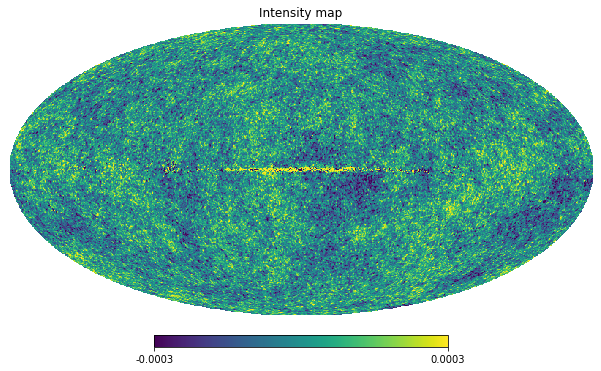

In [ ]:
hp.mollview(Planck[0],min=-0.0003,max=0.0003,title='Intensity map')
# mollview takes a map in input. 
# More options can be used to specify, e.g.,  the color range to be plotted (min,max)
# and a title.

The map above is the intensity (or 'temperature') map as measured by Planck. What you see there is CMB instensity as measured at a given position in the sky. You can easily see that the color changes in the map in a way that the sky seems 'spotty'. These spots correspond to the CMB fluctuations over the average CMB temperature of 2.7K. In particular, yellow spots correspond to hotter regions, while green spots are colder.

Another thing that we can appreciate by eye is that there seems to be no clear pattern in those spots. In a slightly more technical way, we say that the CMB fluctuations are random gaussian.

The color range goes from -300 uK to 300 uK: the signal contained in CMB fluctuations is much smaller than the average CMB signal (compare with 2.7 K!). The average CMB temperature has been subtracted, so that the map shows fluctuations about zero. Units are K (Kelvin).

Now, let's have a look at the other maps in the 'Planck' array.

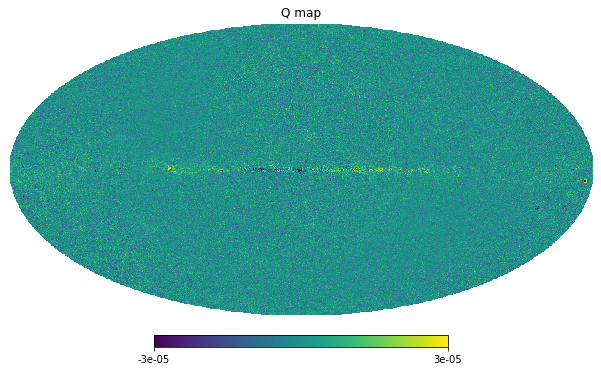

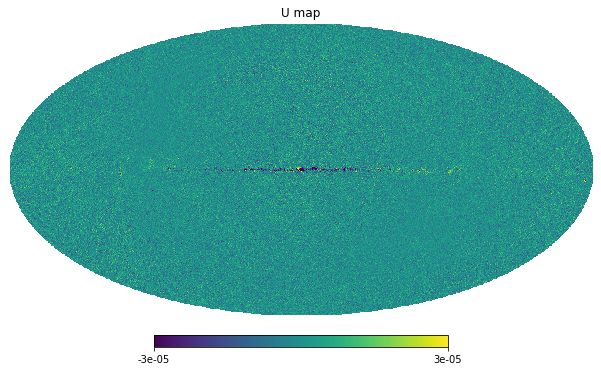

In [ ]:
hp.mollview(Planck[1],min=-3e-5,max=3e-5,title='Q map'),
hp.mollview(Planck[2],min=-3e-5,max=3e-5,title='U map')

The figures above are the CMB polarization maps. We know that the CMB is partly polarized because, at some point during the cosmic evolution, CMB photons scatter off free electrons and get linearly polarized. To describe the CMB polarization, we make use of a formalism from optics. We choose to represent the CMB signal in terms of Stokes parameters: T is the intensity signal, Q and U are the terms that describe linear polarization.

Note the colorbar. CMB polarization fluctuations are much smaller than temperature fluctuations!

# From maps to spectra

Sometimes it is useful to 'compress' the information contained in CMB maps. One way to make this compression is to compute the two-point correlation function. Roughly speaking, this means that we average over the product of signals coming from all points in the sky separated by a given angle. We then repeat this operation for several angle separations. It is more common to talk about the power spectrum instead of the two-point correlation function. The CMB power spectrum is the wiggly function with peaks and throughs that you might have seen often in talks and seminars. Let's see if we can easily understand where it comes from.

The CMB signal is composed by photons that, long time ago, last scattered off matter and started to freely propagate in the Universe. You might have heard that CMB maps are a snapshot of the last-scattering surface (more or less, you will learn more during the course). A such, we can think of the CMB signal as living on the surface of a sphere. We can represent this sphere in 'real space' coordinates, for example dividing the sphere in small patches (pixels) and attaching a number (the CMB instensity, the CMB Q polarization, etc) to each pixel. We can also go for another representation that is much more useful for certain mathematical operations we need to do on CMB data. This other representation is called 'harmonic' representation. It works in this way: instead of dividing the sphere in pixels, we divide it by using special functions called 'spherical harmonics'. These functions are characterized by 2 numbers: ell, which tells you about the angular separation between point on the sphere; emm, which tells you in how many independent ways you can separate two points by the angular separation given by ell.

For example, ell=0 corresponds to the full sphere. Since you only have one sphere, there is only one value of emm that corresponds to ell=0, and it is emm=0. Going forward, ell=1 corresponds to a 180deg angular separation. We have 3 independent ways in which you can dispose points separated by 180deg: along x, along y, along z. So, we have 3 emms corresponding to ell=1, which are emm=-1,0,1. The rule is that, for a given ell, there are 2ell+1 values of emm. 

Using this harmonic representation, the CMB fields (temperature and polarizations) can be decomposed in spherical harmonics. In practice, the CMB signal as measured in a given position on the sky can be written as the sum of infinite spherical harmonic functions, each with its own coefficient. For example, we can write:

T_i = Sum_l Sum_m a_lm Y_lm

where we have defined ell=l and emm=m for convenience. Y_lm is the harmonic function of a given l,m pair. a_lm is the (complex) coefficient of that function. l is summed from 0 to infinity. For each l, m is summed from -l to l. For each l, if we make a histogram of the a_lm, we see that they are gaussian distributed. If we subtract the average CMB temperature from the map, the gaussian distribution is centered in 0, because we are just left with fluctuations over a zero background. The variance of the distribution (which is a measure of the width) is given by

< a_lm a^l'm' > = d_ll' d_mm' C_l

Let's take a moment to understand this formula. The < > symbols indicate that we are taking the average of the expression within brackets. This is a very special average. It is called ensemble average. It means that we should be averaging over all possible realizations of our Universe. The idea here is that, starting from the same initial conditions, we could have had infinite ways in which our Universe could have evolved. However, we can only see the one realization where we happen to live...we will see in a moment what effects arise from this limitation. Let's go back to the formula above. The d_ll' d_mm' are Dirac deltas. They mean that the average is non-zero only when l=l' and m=m'. This comes from the fact that a_lm are independent variables, so there is no correlation between different l's and m's. Finally, C_l is the variance of the gaussian distribution of a_lm. Note that it only depends on l, and not on m. This comes from the fact that the CMB fiels is isotropic: the only thing that matters is the magnitude of the angular separation between points, while the direction along which the points are separated is not relevant. We can thus write:

C_l = Sum_m <|a_lm|^2>/(2l+1)

The C_l is the CMB power spectrum, also known as the harmonic equivalent of the two point correlation function. It tells you how much power in fluctuations you can find if you look at the ell'th harmonic component of the CMB. This is analogous to say how much correlated two points separated by a certain angle are.

# Some issues with the picture above


In practice, we cannot really sum over infinite harmonic functions to get the CMB fields. We have to cut the sum at a given ell_max, that usually depends on the properties of our CMB instrument.

Another problem is that we cannot really average over different realization of the Universe, because we can observe the only Universe we live in. This second problem is solved in the following way. If we take regions in the sky that are separated much more than their size, we can assume that those regions are independent from each other. In other words, we can assume that those regions are independent realizations of the same process that leads to the evolution of our Universe. This assumption is called ergodic hypothesys and is extremely important in statistical physics. It allows to replace our ensamble average over different Universes with the average over different sky patches of the same Universe. The equation for the power spectrum C_l becomes

Ch_l = Sum_m |a_lm|^2/(2l+1)

Note that the < > are missing, and that we are calling the 'new' power spectrum Ch_l and not C_l. This is to distinguish between the 'true' power spectrum (i.e., the one we would measure if we had access to several realizations of the Universe) and the 'estimated' power spectrum (i.e., the one we can compute thanks to the ergodic hypothesys).

This operation introduces an intrinsic source of uncertainty. Roughly speaking, the number of a_lm we can average over to compute Ch_l is limited (only 2l+1 a_lm per given l) with respect to the infinite pool of a_lm that enter the definition of C_l. This limitation is a reflection of our limitation as observers of one Universe, and it is called 'cosmic variance'. We will never make measurements of the CMB spectrum that are more precise than the cosmic variance limit. Since cosmic variance depends on the number of a_lm to average over, it is clear that cosmic variance is a muhch more severe limitation at low multipoles l (or, at large angular separations or 'scales') than at high multipoles (or smaller angular scales).

# Some applications

In what follows, we will apply some of the concepts described above. In particular, we will use some healpy functions to generate spectra from maps and viceversa. We will also see the cosmic variance at play. Finally, we will see how the instrumental properties of our experiments enter the game.

In the 'camb_files' folder, we have a list of files that contain various CMB spectra. We will use the 'totcls' file. You are welcome to see what happens if you use any of the other files. Can you explain your results?

In [ ]:
!ls /content/drive/My\ Drive/s-nsbp/camb_files/

camb_05647368_lensedcls.dat	camb_05647368_scalcls.dat  Planck_ns256.fits
camb_05647368_lensedtotcls.dat	camb_05647368_tenscls.dat
camb_05647368.log		camb_05647368_totcls.dat


Apart from the .fits file that we have already opened, the camb_files folder contains some .dat files and a .log file. The latter is a text file with information about the cosmological model used to generate the CMB spectra contained in the .dat files. The .dat files contain CMB spectra computed from the solutions of the Einstein-Boltzmann equations that describe the evolution of cosmological perturbations. Some numerical codes (Boltzmann solvers) exist that take in input some values of cosmological parameters and give CMB spectra in output (plus other relevant cosmological results that are not the focus of this notebook).

You can see that the folder contains many spectra. CMB fluctuations (as well as matter perturbations) originate from perturbations to the metric. We can distinguish between 3 types of metric perturbations: scalar, vector and tensor. We can safely neglect vector pertubations in the standard cosmological scenario. So, we are left with scalar and tensor components:

1) _scalcls.dat contains the scalar components: TT (temperature auto-spectrum), EE (E polarization auto-spectrum), TE (temperature-polarization cross-spectrum), PhiPhi (gravitational lensing potential power spectrum), TPhi (temperature-lensing cross-spectrum). The first column is the multipole ell;

2) _lensedcls.dat contains a modification of the primary TT,EE,TE spectra due to the effect of the gravitational interactions between photons propagating to the observer and the forming structures of matter in the Universe (gravitational lensing). In addition, it contains a lensing-BB spectrum generated by the distortion of the primary EE spectrum. Note that this lensed BB spectrum is not the primordial BB. The order is: ell, TT, EE, BB, TE.

3) _tenscls.dat contains the tensor components. The order is ell, TT, EE, BB, TE. The BB spectrum contained here is the primordial BB spectrum.

4) _totcls.dat contains the sum of scalcls.dat and tenscls.dat

5) _lensedtot.dat contains the sum of lensedcls.dat and tenscls.dat

Let's load the _totcls.dat

In [ ]:
fname='camb_files/camb_05647368_totcls.dat'
l,TT,EE,BB,TE = np.loadtxt(path_to_data + fname,unpack=True,usecols=(0,1,2,3,4))

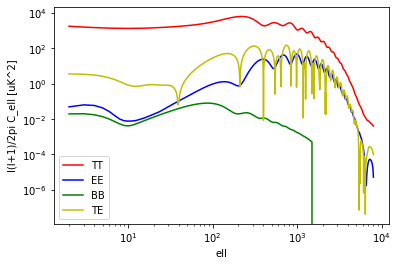

In [ ]:
plt.plot(l,TT,'-r',label='TT')
plt.plot(l,EE,'-b',label='EE')
plt.plot(l,BB,'-g',label='BB')
plt.plot(l,np.abs(TE),'-y',label='TE')
plt.xlabel('ell')
plt.ylabel('l(l+1)/2pi C_ell [uK^2]')
plt.xscale('log')
plt.yscale('log')
plt.legend()

A few considerations: all spectra have a 'wiggly' shape at high multipoles. Those wiggles are due to the acoustic oscillations that baryon (electrons and protons) and photons undergo in the early Universe as a result of the balance between the photon radiation pressure and the baryon tendency to gravitational collapse. 

The wiggles are suppressed at higher multipoles: this is due to the interactions between photons and electrons. Between two consequent interactions, CMB photons propagate freely and CMB fluctuations can be efficiently mediated. The spectrum goes to zero.

The TT spectrum is flat at low multipoles. This happens because that part of the spectrum comes from primordial perturbations that were not in causal contact with the rest of the Universe when the CMB spectrum formed. EE, BB and TE spectra have two large bumps around ell~5 and ell~100. These bumps were generated during the two epochs responsible for polarization generation: reionization (more recent) and recombination (less recent). The CMB polarization is generated by scattering between photons and free electrons. We have free electrons at early times, before matter recombination (~300000 years after the Big Bang, redshift z~1100), and again when the first stars begin to shine (z~6) and high-energy photons ionize the neutral intergalactic medium.

The TT spectrum is much higher than the polarization spectra: a factor 100-100000 (depending on the ell range) higher than EE, a factor 100000 higher than tensor BB if the parameter governing the BB spectrum -- the so-called tensor-to-scalar ratio -- is 1, otherwise the difference is even larger.

Now, let's assume that these spectra represent the Universe we live in. We would like to generate CMB maps from these spectra.

In order to generate maps from these spectra, we need to do the following:

1) we need to add two fields at the beginnin of each spectrum. They correspond to the CMB monopole (ell=0) and dipole (ell=1). We put them manually to zero, because we assume that we have removed them.

2) we need to remove the normalization factor l(l+1)/2pi

In [ ]:
norm=l*(l+1)/2./np.pi
cl=np.zeros((len(TT)+2,4))
cl[2:,0]=TT/norm
cl[2:,1]=EE/norm
cl[2:,2]=BB/norm
cl[2:,3]=TE/norm

The 'synfast' function generates maps from a set of CMB spectra. We can easily understand this operation. We have seen above that the Cl's are the variance of the gaussian distribution of a_lm's centered in zero. If you are given the peak and the variance of a gaussian distribution, you can draw any number of variables from that distribution. There are numerical codes that generate random numbers from a given probability distribution. The synfast function is doing something similar: given the variance C_l (and the peak given by the monopole ell=0), synfast is drawing a set of random variables that follow that gaussian distribution. From these variables (the a_lm), synfast can provide the CMB map.

You can use the following orders for the spectra in synfast:

1) TT, EE, BB, TE. In this case, set the 'new' option to True. This is recommended.

2) TT, TE, EE, BB. In this case, set the 'new' option to False.

In [ ]:
map=hp.synfast([cl[:,0],cl[:,1],cl[:,2],cl[:,3]],nside=512,new=True)

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


Let's have a look at these new maps!

# First task

Visualize the maps generated with synfast. Attach a title to each map. Write your code in the cell below. The hidden cell contains the solution to this task. Have a glimpse to it (click on 'SHOW CODE') only after a few tries. 

In [ ]:
# Your code here
# ...

In [ ]:
#@title
hp.mollview(map[0],title='Intensity')
hp.mollview(map[1],title='Q')
hp.mollview(map[2],title='U')

Now we can compute the power spectra from the maps above and compare them with the original power spectra. We use the 'anafast' function from healpy. Anafast take the maps in input and compute the power spectra from those maps. If 3 maps (T,Q,U) are given, anafast generates one auto-power spectrum per map (TT,EE,BB), plus the cross-correlation between T and E, T and B, E and B.

In [ ]:
clout=hp.anafast(map)

Let's define an array of multipoles that we will use for plotting and for computing the normalization factor l(l+1)/2pi

In [ ]:
lout=np.arange(2,len(clout[0,:]))
normout=lout*(lout+1)/2./np.pi

Now, let's plot the new power spectrum together with the original power spectrum. Do you see any differences? Are the spectra identical?

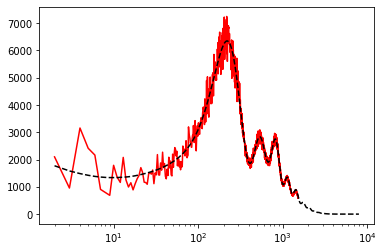

In [ ]:
plt.plot(lout,clout[0,2:]*normout,'-r')
plt.plot(l,TT,'--k')
plt.xscale('log')

# Second task

Plot the other spectra (EE,BB,TE) together with the the original spectra

In [ ]:
# Your code here
# ...

In [ ]:
#@title
plt.plot(lout,clout[1,2:]*normout,'-b',label='EE')
plt.plot(lout,clout[2,2:]*normout,'-y',label='BB')
plt.plot(lout,clout[3,2:]*normout,'-g',label='TE')
plt.plot(l,EE,'--k')
plt.plot(l,BB,'--k')
plt.plot(l,TE,'--k')
plt.legend()
plt.xlabel('ell')
plt.ylabel('l(l+1)/2pi C_l [uK^2]')
plt.xscale('log')

"\nplt.plot(lout,clout[1,2:]*normout,'-b',label='EE')\nplt.plot(lout,clout[2,2:]*normout,'-y',label='BB')\nplt.plot(lout,clout[3,2:]*normout,'-g',label='TE')\nplt.plot(l,EE,'--k')\nplt.plot(l,BB,'--k')\nplt.plot(l,TE,'--k')\nplt.legend()\nplt.xlabel('ell')\nplt.ylabel('l(l+1)/2pi C_l [uK^2]')\nplt.xscale('log')\n"

# Third task

Redo the procedure above. Generate new maps (we call them map1 for convenience) from the original power spectra and compare these new maps with the previous ones (map). For example, compute the difference between map1 and map, component by component. Is this difference vanishing? Why?

In [ ]:
# Your code here
# ...

In [ ]:
#@title
map1=hp.synfast([cl[:,0],cl[:,1],cl[:,2],cl[:,3]],nside=512,new=True)
map-map1

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


Compute power spectra from map1 and compare them with the power spectra obtained from map and with the original power spectra. Are all these sets of spectra identical to each other? Why?

In [ ]:
# Your code here
# ...

In [ ]:
#@title
clout1=hp.anafast(map1)
plt.plot(lout,clout[0,2:]*normout,'-r',label='TT from map')
plt.plot(lout,clout1[0,2:]*normout,'-b',label='TT from map1')
plt.plot(l,TT,'--k')
plt.xlabel('ell')
plt.ylabel('l(l+1)/2pi C_l [uK^2]')
plt.xscale('log')

What you have just seen is cosmic variance at play. Each of the set of maps generated from the original power spectra are different realizations of the Universe. Operationally, this is achieved by using a different seed in the random generator used by synfast. This is why if you take the difference of pairs of maps, this difference does not vanish. 

The original power spectra correspond to the 'true' variance (C_l). The power spectra computed from each set of maps are estimated Ch_l of C_l. For this reason, each individual Ch_l is not identical to the original C_l.  

However, if we could take the ensamble average of Ch_l, we would recover C_l. Let's check this point.

# Fourth task

From the same original power spectra, generate 10 sets of T,Q,U maps. From each set, compute the corresponding power spectra. Plot all TT spectra together with the original TT. Can you see by eye where the original spectra sit in the plot with respect to the 10 different realizations? 

Compute the average of the 10 TT spectra and compare it with the original TT power spectrum. How does the average compare with the original TT?

In [ ]:
# Your code here
# ...

Running sim number: 1
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Running sim number: 2
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Running sim number: 3
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Running sim number: 4
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Running sim number: 5
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Running sim number: 6
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Running sim number: 7
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Running sim number: 8
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Running sim number: 9
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Running sim number: 10
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


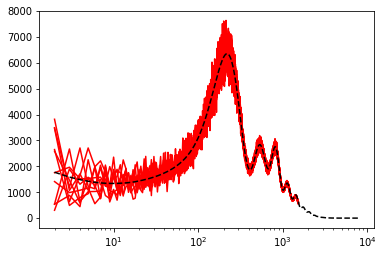

In [ ]:
#@title
clav=0
for i in np.arange(10):
  print('Running sim number:',i+1)
  map=hp.synfast([cl[:,0],cl[:,1],cl[:,2],cl[:,3]],nside=512,new=True)
  clout=hp.anafast(map)
  clav+=clout
  plt.plot(lout,clout[0,2:]*normout,'-r')

plt.plot(l,TT,'--k')
plt.xscale('log')

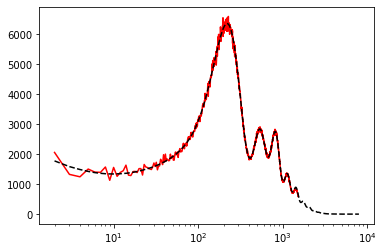

In [ ]:
#@title
plt.plot(lout,clav[0,2:]*normout/10.,'-r')
plt.plot(l,TT,'--k')
plt.xscale('log')

You can try and see that, if you increase the number of realizations to average over, the difference between the original TT and the averaged TT decreases.

# Fifth task

Redo the task above with a different power spectrum, e.g. with TE.

In [ ]:
# Your code here
# ...
# There are no hidden cells with solutions here. You can simply check the procedure used with TT.

# Pixelization

Did you notice that the spectra reconstructed from individual realizations do not reach the same l_max as the fiducial spectra. For example, in the figures above, the reconstructed spectra end slightly above l~1500. Why is that? This has to do with the 'nside' option we used in 'synfast'. 

nside gives the number of pixels in which the simulated map has to be divided, according to the healpix formalism. The basic idea behind the healpix formalism is that one can start by dividing the sphere in 12 patches (pixels). This is nside=1. Each patch contains the average over the sky signal from points that fall inside the patch. Then, you can increase the resolution of your map -- or equivalently you can descrease the size of each pixel -- by dividing each patch by 4. So, nside=2 means that you have 12 x 4 total pixels, and so on. The general rule is that the number of pixels in a nside-resolution map is 12 x nside^2. 

The size of a pixel represents a threshold for lmax. It makes no sense to compute the signal coming from scales that are smaller than the pixel size. The rule of the thumb is that one can exctact reliable spectra up to lmax=3 x nside from nside-resolution maps. This limit is set by the mathematical implementation of the anafast function.

# Sixth task

From the fiducial power spectra, generate new maps with different values of nside. Compare the maps. Do you see any difference? Then, from each sets of maps, compute the corresponding spectra (start from TT) with anafast. Compare the spectra. Do you see any difference?

In [ ]:
# Your code here
# ...

In [ ]:
#@title
np.random.seed(1234)
map=hp.synfast([cl[:,0],cl[:,1],cl[:,2],cl[:,3]],
                  nside=512,new=True)
np.random.seed(1234)
map256=hp.synfast([cl[:,0],cl[:,1],cl[:,2],cl[:,3]],
                  nside=256,new=True)
np.random.seed(1234)
map1024=hp.synfast([cl[:,0],cl[:,1],cl[:,2],cl[:,3]],
                   nside=1024,new=True)
hp.mollview(map[0],title='nside=512')
hp.mollview(map256[0],title='nside=256')
hp.mollview(map1024[0],title='nside=1024')

# One small thing to note: 
# we have explicitly set the seed for the random generator 
# that synfast uses to draw the a_lm realizations 
# from the given cl. In doing so, we are making sure that 
# both maps (map and map_smeared) are the same realization, 
# and only differ for the beam resolution.

In [ ]:
#@title
clout=hp.anafast(map)
cl256=hp.anafast(map256)
cl1024=hp.anafast(map1024)

In [ ]:
#@title
l256=np.arange(2,len(cl256[0,:]))
norm256=l256*(l256+1)/2./np.pi
l1024=np.arange(2,len(cl1024[0,:]))
norm1024=l1024*(l1024+1)/2./np.pi

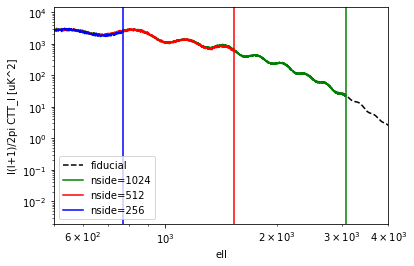

In [ ]:
#@title
plt.plot(l,TT,'--k',label='fiducial')
plt.plot(l1024,cl1024[0,2:]*norm1024,'-g',label='nside=1024')
plt.plot(lout,clout[0,2:]*normout,'-r',label='nside=512')
plt.plot(l256,cl256[0,2:]*norm256,'-b',label='nside=256')
plt.axvline(3*256,c='b')
plt.axvline(3*512,c='r')
plt.axvline(3*1024,c='g')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('ell')
plt.ylabel('l(l+1)/2pi CTT_l [uK^2]')
plt.xlim([500,4000])
plt.legend()

# Experimental resolution

We have mentioned a few blocks above that our experimental setup usually dictates lmax. In practice, the telescope's mirror size, the optical configuration, the wavelength of the observed signal all combine to set a threshold to the smallest angular scale that we can resolve with a given experiment. And we have already seen that the smallest angular scales map onto the highest multipoles we can reach in computing the power spectra.

From an experimental point of view, what happens is the following: when we observe a patch in the sky, we receive signal from many points around the direction of observation. In other words, the signal observed along a certain direction takes contributions from all angular directions. If we had an ideal experiment with infinite resolution, we would assign zero importance (or 'weight') to the signal coming from any direction that is not the observing direction. However, our experiments have a certain resolution (they can distinguish only those points that are sufficiently apart from each other). Therefore, our experiments assign different weights to the signal coming from various directions. The function that describes how weights are assigned is called angular response, or 'beam'. In harmonic space, the effect of the beam is very simple to represent:

Chb_l = B_l^2 Ch_l

In other words, what we really observe is not the estimated power spectrum (Ch_l). Instead, it is Chb_l, the Ch_l multiplied by the beam function (B_l^2, which is squared because the beam is first applied to the map).

The simplest beam we can think of has a gaussian shape with a given width sigma. The smallest sigma, the highest the experimental resolution. It is more common to specify the angular resolution in terms of the full-width at half maximum (FWHM) of the beam function. The FWHM is related to sigma as follows:

FWHM = 2 sqrt(2 ln(2)) sigma

The harmonic expression of a gaussian beam is

B_l^2 = exp(-l(l+1)sigma^2)

From this expression, we can note two things:

1) at any given sigma, B_l^2 goes to zero at high multipoles (the exponential function goes to zero when the exponent goes to large, negative values)

2) at any given multipole, B_l^2 goes to zero as sigma increases 

healpy provides a function to compute the gaussian beam given a certain sigma. This function is 'gauss_beam'. This function takes the fwhm (in radians, remember that x[deg]:180 = x[rad]:pi) and lmax in input and returns the harmonic expression of B_l^2. 

Text(0, 0.5, 'B_l^2')

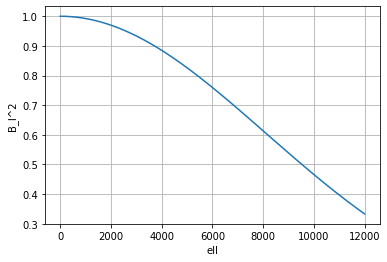

In [ ]:
fwhm=1./60.*np.pi/180. # This is 1 arcmin in rad
bl=hp.gauss_beam(fwhm,lmax=12000)
plt.plot(bl,label='fwhm=1 arcmin')
plt.grid()
plt.xlabel('ell')
plt.ylabel('B_l^2')

As you can see from the figure above, the power observed with an experiment with 1 arcmin resolution is 20% lower than the real power in the sky at l~5000. A rough rule of the thumb to map a given beam size to a given lmax is the following. You can imagine that a great circle of 360deg is decomposed into 2l spherical harmonic components with index l. Therefore, the angular size of each component is:

theta[deg]= 360[deg]/2l = 180[deg]/l

As an example, one degree on the sky corresponds to l~200. A 1deg resolution would significantly suppress power at l>200. 

When scientists reconstruct the power spectrum from raw data, they have to take into account the beam effect, and correct for it.

# Seventh task

Compute the beam for different FWHM. For example, compute it for:

1) FWHM=7 deg. This is COBE-DMR resolution.

2) FWHM=0.22 deg. This is the WMAP resolution at ~90GHz.

3) FWHM=9.94 arcmin (1 arcmin=1/60 deg). This is Planck resolution at ~100 GHz.

4) FWHM=2.2 arcmin. This is Simons Observatory's LAT resolution at ~90 GHz.

Compare the 4 beams. Which of those beams retain more power at higher multipoles? Using the formula above that relates angular scales to multipoles, compute the lmax above which any of the 4 beams significantly suppress power.

In [ ]:
# Your code here
# ...

In [ ]:
#@title
fwhm_dmr=7.*np.pi/180. # This is 7deg in rad
fwhm_wmap=0.22*np.pi/180. # This is 0.22 in rad
fwhm_planck=9.94/60.*np.pi/180. # This is 9.94 arcmin in rad
fwhm_SOLAT=2.2/60.*np.pi/180. # This is 2.2 arcmin in rad
bl_dmr=hp.gauss_beam(fwhm_dmr,lmax=12000)
bl_wmap=hp.gauss_beam(fwhm_wmap,lmax=12000)
bl_planck=hp.gauss_beam(fwhm_planck,lmax=12000)
bl_SOLAT=hp.gauss_beam(fwhm_SOLAT,lmax=12000)

In [ ]:
#@title
plt.plot(bl_dmr,label='COBE-DMR')
plt.plot(bl_wmap,label='WMAP')
plt.plot(bl_planck,label='Planck')
plt.plot(bl_SOLAT,label='SO LAT')
plt.grid()
plt.xlabel('ell')
plt.ylabel('B_l^2')
plt.legend()

In [45]:
#@title
lmax_dmr=180./7.
lmax_wmap=180./0.22
lmax_planck=180.*60./9.94
lmax_SOLAT=180.*60./2.2
print('COBE-DMR lmax= ',lmax_dmr)
print('WMAP lmax= ',lmax_wmap)
print('Planck lmax= ',lmax_planck)
print('SO LAT lmax= ',lmax_SOLAT)

Now, let's see the beam effect at play. We can simulate the effects of observing the sky with a finite-resolution experiment by appropriately setting the 'fwhm' option in synfast. Before doing that, there is one thing to pay attention to. In order to avoid systematic effects due to pixelizations (i.e., due to the fact that we are dividing the sphere in small patches), we have to make sure that the pixel size is smaller than the experimental resolution. In other words, we ideally want that a few pixels are contained within the angular size of our beam. In practice, this means that we have to tune correctly the nside and fwhm options based on our experimental resolution. For example, we have seen above that a 1deg resolution experiment would suppress power above l~200. So, we need to choose nside such that lmax=3 nside>>200.

In [46]:
np.random.seed(1234)
map=hp.synfast([cl[:,0],cl[:,1],cl[:,2],cl[:,3]],nside=512,new=True,fwhm=0.)
np.random.seed(1234)
fwhm=np.pi/180. #Let's try with a 1deg resolution
map_smeared=hp.synfast([cl[:,0],cl[:,1],cl[:,2],cl[:,3]],nside=512,new=True,fwhm=fwhm)

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 25.479654 arcmin (0.007412 rad) 
-> fwhm is 60.000000 arcmin


One small thing to note: 
we have explicitly set the seed for the random generator 
that synfast uses to draw the a_lm realizations 
from the given cl. In doing so, we are making sure that 
both maps (map and map_smeared) are the same realization, 
and only differ for the beam resolution.

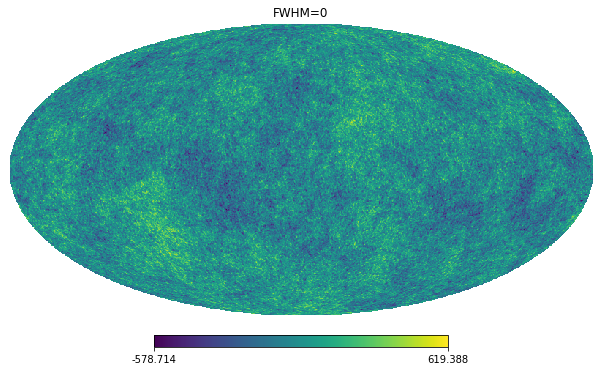

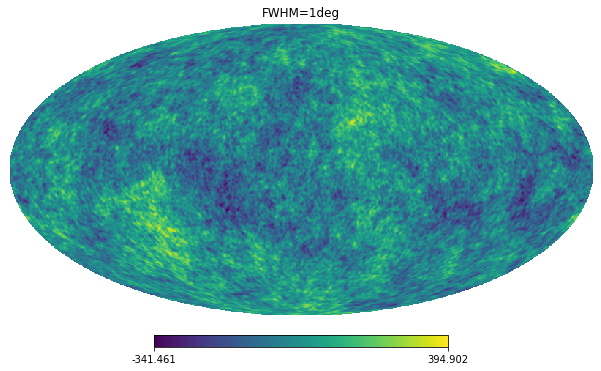

In [47]:
hp.mollview(map[0],title='FWHM=0')
hp.mollview(map_smeared[0],title='FWHM=1deg')

Do you notice any difference between the two maps above? Note how the second map has much smoother features than the first map. In the first map, you can appreciate fluctuations over much smaller angular scales than in the second map. Note that the two maps share the same nside and have been generated from the same fiducial spectra. They only differ for the beam resolution.

Let's now compute the power spectra from the two maps.

In [48]:
clout=hp.anafast(map)
lout=np.arange(2,len(clout[0,:]))
normout=lout*(lout+1)/2./np.pi
cl_smeared=hp.anafast(map_smeared)
l_smeared=np.arange(2,len(cl_smeared[0,:]))
norm_smeared=l_smeared*(l_smeared+1)/2./np.pi

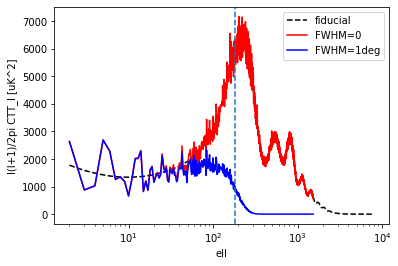

In [49]:
plt.plot(l,TT,'--k',label='fiducial')
plt.plot(lout,clout[0,2:]*normout,'-r',label='FWHM=0')
plt.plot(l_smeared,cl_smeared[0,2:]*norm_smeared,'-b',label='FWHM=1deg')
plt.xscale('log')
plt.axvline(180,ls='--')
plt.xlabel('ell')
plt.ylabel('l(l+1)/2pi CTT_l [uK^2]')
plt.legend()

See how the two reconstructed spectra match perfectly at small multipoles, while they diverge as l increases. See how the power is significantly suppressed at l~>200 for the blue curve.

Luckly enough, we can correct for this effect simply by rescaling the blue spectrum by the beam function:

Ch_l = Chb_l / B_l^2

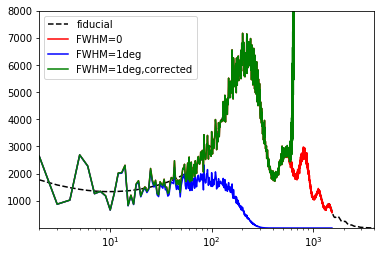

In [ ]:
fwhm=np.pi/180. 
bl=hp.gauss_beam(fwhm,lmax=len(cl_smeared[0,:])-1)
plt.plot(l,TT,'--k',label='fiducial')
plt.plot(lout,clout[0,2:]*normout,'-r',label='FWHM=0')
plt.plot(l_smeared,cl_smeared[0,2:]*norm_smeared,'-b',label='FWHM=1deg')
plt.plot(l_smeared,cl_smeared[0,2:]*norm_smeared/bl[2:]**2,'-g',label='FWHM=1deg,corrected')
plt.xscale('log')
#plt.yscale('log')
plt.xlim([2,4000])
plt.ylim([0.1,8000])
plt.legend()

To obtain the green curve above, we have divided the reconstructed spectra (cl_smeared) by the squared beam function. See how this helps correct the result: the green curve nicely overlap with the red curve. However, there is a limit above which no further correction is allowed. This limit is set by the fact that the beam function gives zero weight to highest multipoles. Above a certain multipole, the power is definitely suppressed and it is no longer possible to reconstruct it. The behaviour of the green curve above the threshold cannot be trusted.

# Eighth task

Compute the power spectra from each of the maps smeared by the angle computed in the seventh task. Compare these spectra. What differences can be highlighted? Can you correct for the beam effect?

In [ ]:
# Your code here
# ...

In [ ]:
#@title
np.random.seed(1234)
map_dmr=hp.synfast([cl[:,0],cl[:,1],cl[:,2],cl[:,3]],nside=512,new=True,fwhm=fwhm_dmr)
np.random.seed(1234)
map_wmap=hp.synfast([cl[:,0],cl[:,1],cl[:,2],cl[:,3]],nside=512,new=True,fwhm=fwhm_wmap)
np.random.seed(1234)
map_planck=hp.synfast([cl[:,0],cl[:,1],cl[:,2],cl[:,3]],nside=512,new=True,fwhm=fwhm_planck)
np.random.seed(1234)
map_SOLAT=hp.synfast([cl[:,0],cl[:,1],cl[:,2],cl[:,3]],nside=512,new=True,fwhm=fwhm_SOLAT)

In [53]:
#@title
cl_dmr=hp.anafast(map_dmr)
lout=np.arange(2,len(cl_dmr[0,:]))
normout=lout*(lout+1)/2./np.pi
cl_wmap=hp.anafast(map_wmap)
cl_planck=hp.anafast(map_planck)
cl_SOLAT=hp.anafast(map_SOLAT)

In [ ]:
#@title
plt.plot(l,TT,'--k',label='fiducial')
plt.plot(lout,cl_dmr[0,2:]*normout,'-r',label='COBE-DMR')
plt.plot(lout,cl_wmap[0,2:]*normout,'-b',label='WMAP')
plt.plot(lout,cl_planck[0,2:]*normout,'-g',label='Planck')
plt.plot(lout,cl_SOLAT[0,2:]*normout,'-y',label='SO LAT')
plt.xscale('log')
#plt.yscale('log')
plt.xlim([2,4000])
plt.ylim([0.01,8000])
plt.legend()

In [ ]:
#@title
plt.plot(l,TT,'--k',label='fiducial')
plt.plot(lout,cl_dmr[0,2:]*normout/bl_dmr[2:len(cl_dmr[0,:])]**2,'-r',label='COBE-DMR')
plt.plot(lout,cl_wmap[0,2:]*normout/bl_wmap[2:len(cl_dmr[0,:])]**2,'-b',label='WMAP')
plt.plot(lout,cl_planck[0,2:]*normout/bl_planck[2:len(cl_dmr[0,:])]**2,'-g',label='Planck')
plt.plot(lout,cl_SOLAT[0,2:]*normout/bl_SOLAT[2:len(cl_dmr[0,:])]**2,'-y',label='SO LAT')
plt.xscale('log')
#plt.yscale('log')
plt.xlim([2,4000])
plt.ylim([0.1,8000])
plt.legend()

# Experimental noise

A real experiment cannot avoid to deal with experimental noise. In practice, this means that the total signal collected by our detectors is given by the sum of the cosmological signal (plus other sources of galactic and extra-galactic signals, the so-called foregrounds) and the experimental noise. The noise component depends on the experimental properties. It has to be characterised and subtracted from the total signal. 

In what follows, we focus on the rather simple case of isotropic noise in real space, i.e. a noise component that does not depend on the direction of observation. This is a simple case because it matches what happens with the CMB power spectrum. Remember that the CMB signal is also isotropic. This means that the variance of the CMB field in harmonic space (the power spectrum C_l) only depends on the multipole l (and not on m). In a similar way, a isotropic noise in real space has a power spectrum that only depends on l: 

N_l = Sum_m |n_lm|^2 /(2l+1)

We can further simplify this picture and assume that the noise is also homogeneous. This means that the noise variance is the same in each pixel. In other words, the noise in each pixel is a random variable drawn from the same gaussian distribution of a given variance. This translates to a flat noise spectrum in harmonic space: 

n_lm = n --> N_l = Sum_m |n|^2 /(2l+1) = (2l+1) |n|^2 / (2l+1) = |n|^2

This noise level can be specified in units of uK.arcmin. The Simons Observatory goal noise level at ~90GHz is 5.8 uK.arcmin. The noise spectrum is obtained reporting arcmin in rad and taking the square of the noise level:

Text(0, 0.5, 'l(l+1) N_l/2pi [uK^2]')

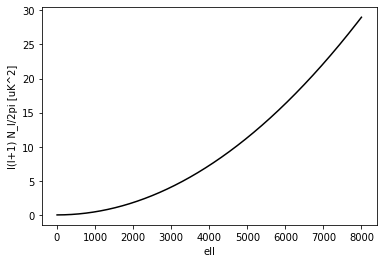

In [61]:
sens_SOLAT=5.8 #in uK.arcmin
var=(sens_SOLAT*np.pi/180./60.)**2
l=np.arange(2,8000)
plt.plot(l,l*(l+1)*var/2./np.pi,'-k')
plt.xlabel('ell')
plt.ylabel('l(l+1) N_l/2pi [uK^2]')

This is the noise level in temperature. The noise level in polarization is higher by a factor sqrt(2), and so the polarization noise spectrum is twice the temperature noise spectrum. This happens because one needs two detectors to correctly reconstruct the polarization signal. 

# Ninth task

Compute the polarization noise spectrum for Simons Observatory. 

In [ ]:
# Your code here
# ...

In [ ]:
#@title
senspol_SOLAT=sens_SOLAT*np.sqrt(2)
varpol=(senspol_SOLAT*np.pi/180./60.)**2
l=np.arange(2,8000)
plt.plot(l,l*(l+1)*var/2./np.pi,'-k',label='T noise')
plt.plot(l,l*(l+1)*varpol/2./np.pi,'-r',label='Pol noise')
plt.xlabel('ell')
plt.ylabel('l(l+1) N_l/2pi [uK^2]')
plt.legend()

# Tenth task

Compare the SO noise spectra with the signal (smeared by the beam). In which multipole range the signal is higher than the noise (signal-to-noise ratio higher than 1)?

Knowing that Planck sensitivity is ~60 uK.arcmin in temperature at ~100GHz, compute the Planck noise spectra. Knowing that the beam resolution is ~7arcmin, compute the reconstucted power spectra for Planck, compare them with the noise spectra. Compare the result with what obtained for SO.

Tip: need to use high enough nside...

In [ ]:
# Your code here
# ...

In [ ]:
#@title
np.random.seed(1234)
map_so=hp.synfast([cl[:,0],cl[:,1],cl[:,2],cl[:,3]],nside=2048,new=True,fwhm=fwhm_SOLAT)

In [66]:
#@title
cl_SOLAT=hp.anafast(map_so[0])
lout=np.arange(2,len(cl_SOLAT))
normout=lout*(lout+1)/2./np.pi

In [ ]:
#@title
l=np.arange(2,8000)
plt.plot(lout,normout*cl_SOLAT[2:],'-k',label='TT measured by SO')
plt.plot(l,l*(l+1)*var/2./np.pi,'-r',label='SO Noise')
plt.xlabel('ell')
plt.ylabel('l(l+1) C_l/2pi [uK^2]')
#plt.xlim([2,4000])
plt.xscale('log')
plt.yscale('log')
plt.legend()

The procedure for Planck is straightforward, just follow the same steps as for SO LAT.

# Conclusion

This notebook is a very quick overview of some aspects in CMB data analysis. We have started from an ideal picture with no noise, no instrumental effects, full sky observations. Then, we have slighlty perturbed this approach and introduced some minor complications, such as gaussian beam and isotropic and homogeneous noise. However, real life is much harder than this! Instrumental effects are more complicated, the noise properties are much more complicated (one example for all: SO is a ground-based experiment, and therefore it cannot avoid effects from the very noisy atmosphere), CMB experiments can usually observe and/or retain farctions of the full sky because of intrinsic limitations due to the geography of the observing sky or due to the fact that portions of the sky are too contaminated by non-cosmological signals...

Nevertheless, CMB scientists have been able to extract the tiny CMB signal out of this complicated scenarios since the time of Penzias and Wilson. And the story continues, as Simons Observatory is approaching first light and will unveil new secrets carried by the most ancient photons in our Universe!